In [14]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

def compute_cumHisto(image: np.ndarray) -> np.ndarray:
    hist, bin_edges = np.histogram(image, bins=256, range=(0, 256))
    cumHisto = np.cumsum(hist)
    return cumHisto

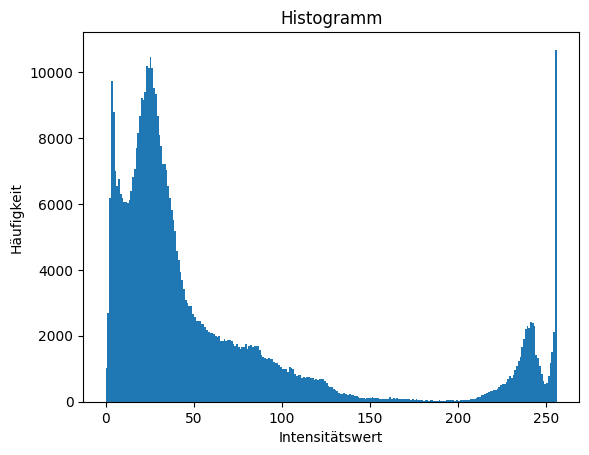

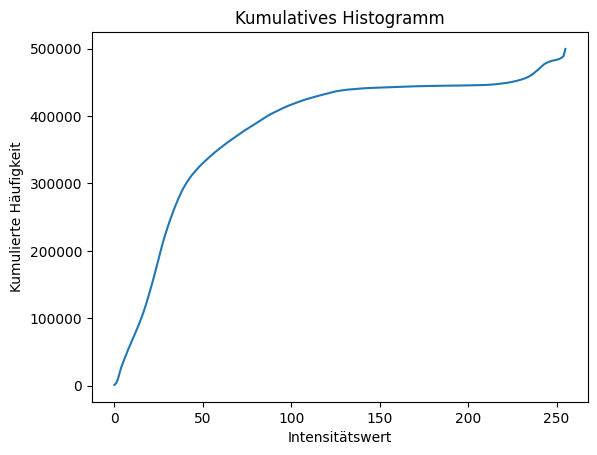

In [15]:
image = imread("bild01.jpg")

cum_hist = compute_cumHisto(image)

plt.figure()
plt.title("Histogramm")
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.xlabel("Intensitätswert")
plt.ylabel("Häufigkeit")
plt.show()

plt.figure()
plt.title("Kumulatives Histogramm")
plt.plot(cum_hist)
plt.xlabel("Intensitätswert")
plt.ylabel("Kumulierte Häufigkeit")
plt.show()

**a) Homogene vs. nicht-homogene Punktoperationen:**
- **Homogene Punktoperation:**  
  Eine Funktion f(I) ist homogen, wenn sie skaliert wird, d.h. f(λ·I) = λ·f(I). Hier wirken sich alle Pixelwerte proportional gleich aus.
  
- **Nicht-homogene Punktoperation:**  
  Hier wird neben der Skalierung meist auch ein Offset addiert oder eine andere nicht-lineare Transformation angewandt. Es gilt dann f(λ·I) ≠ λ·f(I), da der zusätzliche Offset oder die nicht-lineare Änderung die Relation verändert.

**b) Unterschied zwischen Punktoperationen und Filteroperationen:**
- **Punktoperationen:**  
  Werden pixelweise angewandt, wobei der neue Wert eines Pixels nur vom ursprünglichen Wert dieses Pixels abhängt. Beispiele: Helligkeitsanpassung, Kontraständerung, Anwendung einer Lookup-Tabelle.

- **Filteroperationen:**  
  Beziehen sich auf ein Pixel und dessen Umgebung. Der neue Wert eines Pixels wird durch eine Funktion (z.B. Mittelwert, Faltung) der Werte in einem lokalen Fenster (Nachbarschaft) berechnet. Beispiele: Weichzeichnen, Schärfen, Kantenfilter.

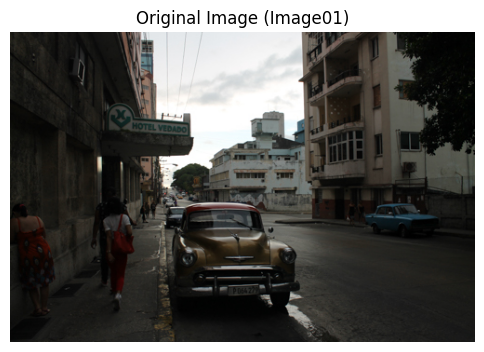

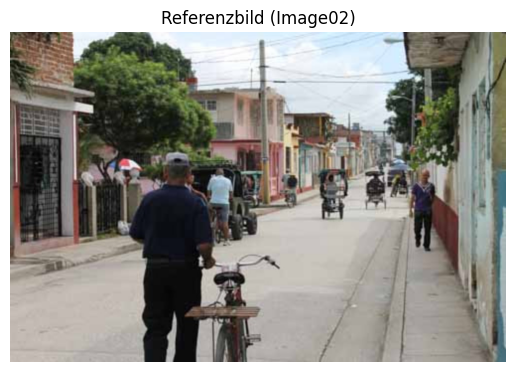

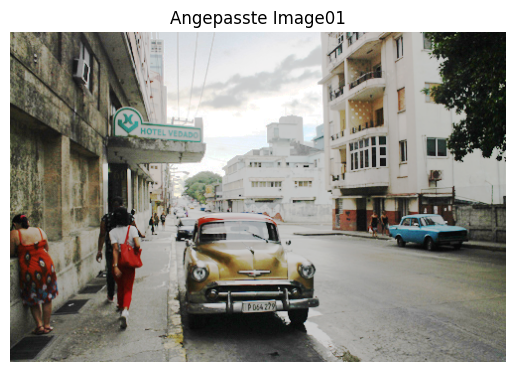

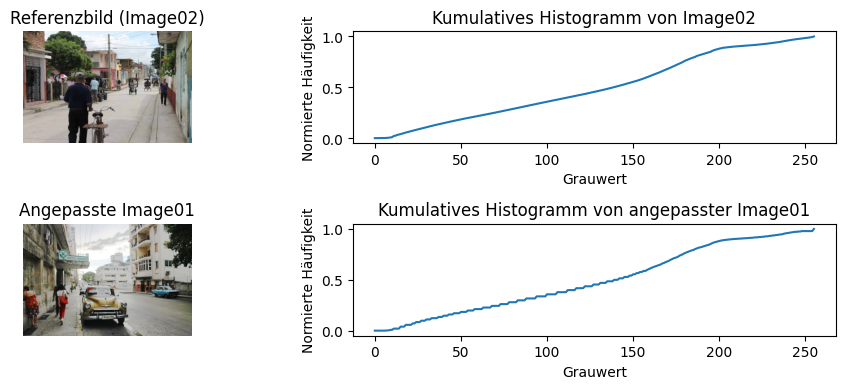

In [18]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

def compute_norm_cumHisto(image: np.ndarray) -> np.ndarray:
    """
    Berechnet das normalisierte kumulative Histogramm eines Bildes.
    """
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    cum = np.cumsum(hist)
    norm_cum = cum / cum[-1]  # Normierung auf [0,1]
    return norm_cum

def matchHisto(img_cum: np.ndarray, ref_cum: np.ndarray) -> np.ndarray:
    """
    Erzeugt eine Lookup-Tabelle, um das Bild mit dem kumulativen Histogramm img_cum
    so anzupassen, dass es der Referenzverteilung ref_cum entspricht.
    
    img_cum: Normalisiertes kumulatives Histogramm des anzupassenden Bildes.
    ref_cum: Normalisiertes kumulatives Histogramm des Referenzbildes.
    
    Rückgabe:
        LUT: Die Lookup-Tabelle (np.ndarray mit 256 Einträgen).
    """
    LUT = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        # Finde den Grauwert in ref_cum, der am besten zu img_cum[i] passt.
        diff = np.abs(ref_cum - img_cum[i])
        LUT[i] = np.argmin(diff)
    return LUT

# Bilder einlesen (mit scikit-image)
image01 = imread("bild01.jpg")
image02 = imread("bild02.jpg")

# Normalisierte kumulative Histogramme berechnen
cum_img01 = compute_norm_cumHisto(image01)
cum_img02 = compute_norm_cumHisto(image02)

# Lookup-Tabelle erstellen, sodass das kumulative Histogramm von image01 an das von image02 angepasst wird
LUT = matchHisto(cum_img01, cum_img02)

# Histogrammanpassung auf image01 anwenden
adjusted_img01 = LUT[image01]
plt.figure(figsize=(6, 6))
plt.imshow(image01, cmap='gray')
plt.title("Original Image (Image01)")
plt.axis('off')
plt.show()
# Zuerst die beiden Bilder separat anzeigen:
plt.figure()
plt.imshow(image02, cmap='gray')
plt.title("Referenzbild (Image02)")
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(adjusted_img01, cmap='gray')
plt.title("Angepasste Image01")
plt.axis('off')
plt.show()

# Anschließend das Referenzbild, die angepasste Version und deren kumulative Histogramme in einem Subplot:
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.imshow(image02, cmap='gray')
plt.title("Referenzbild (Image02)")
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(cum_img02)
plt.title("Kumulatives Histogramm von Image02")
plt.xlabel("Grauwert")
plt.ylabel("Normierte Häufigkeit")

plt.subplot(2,2,3)
plt.imshow(adjusted_img01, cmap='gray')
plt.title("Angepasste Image01")
plt.axis('off')

plt.subplot(2,2,4)
plt.plot(compute_norm_cumHisto(adjusted_img01))
plt.title("Kumulatives Histogramm von angepasster Image01")
plt.xlabel("Grauwert")
plt.ylabel("Normierte Häufigkeit")

plt.tight_layout()
plt.show()